<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [204]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [205]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [206]:
#se verifica que hay valores nulos en la columna "species"
df["species"].isnull().any()

True

In [207]:
# se reemplazan los valores nulos por default
df["species"] = df["species"].fillna("default")

In [208]:
df.isnull().any()

sepalLength     True
sepalWidth      True
petalLength     True
petalWidth      True
species        False
dtype: bool

In [209]:
df["species"].count()

150

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

In [210]:
#se verifica que ya no hay valores nulos en la columna species
df.isnull().any()

sepalLength     True
sepalWidth      True
petalLength     True
petalWidth      True
species        False
dtype: bool

In [211]:
#se reemplazan los valores nulos por 0 en las otras columnas
df = df.fillna(0)
df.isnull().any()

sepalLength    False
sepalWidth     False
petalLength    False
petalWidth     False
species        False
dtype: bool

In [212]:
#se observa que no hay uniformidad en la nomenclatura y por lo tanto hay más clasificaciones de las que debieran 
cantidad = df.groupby('species')
cantidad['species'].count()

species
 virginica     5
SETOSA         5
Setosa        10
VERSICOLOR     5
VIRGINICA      5
Versicolor     5
default        1
setosa        35
versicolor    39
virginica     34
virginica      6
Name: species, dtype: int64

In [213]:
#se "limpian" los nombres de las categorías
df["species"] = df["species"].str.lower().str.strip()
cantidad = df.groupby('species')
cantidad['species'].count()

species
default        1
setosa        50
versicolor    49
virginica     50
Name: species, dtype: int64

In [214]:
df_sepal = df.drop(['petalLength', 'petalWidth'], axis=1)
df_petal = df.drop(['sepalLength', 'sepalWidth'], axis=1)

<AxesSubplot:>

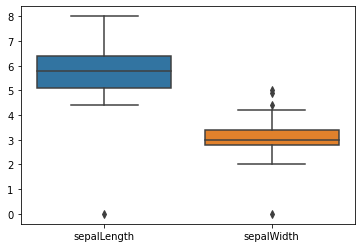

In [215]:
sns.boxplot(data=df_sepal)

<AxesSubplot:>

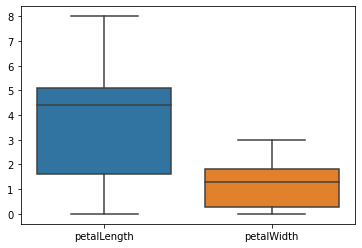

In [216]:
sns.boxplot(data=df_petal)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [242]:
# sepal length 4-7; sepal width 2-4.5 ; petal length 1-7 ; petal width 0.1 - 2.5
#se clasifican como "True" los outliers 
mask_sl_inf =  df['sepalLength']>=7
mask_sl_sup =  df['sepalLength']<=4
mask_sl = mask_sl_inf | mask_sl_sup

mask_sw_inf =  df['sepalWidth']>=4.5
mask_sw_sup =  df['sepalWidth']<=2
mask_sw = mask_sw_inf | mask_sw_sup

mask_pl_inf =  df['petalLength']>=7
mask_pl_sup =  df['petalLength']<=1
mask_pl = mask_pl_inf | mask_pl_sup

mask_pw_inf =  df['petalWidth']>=2.5
mask_pw_sup =  df['petalWidth']<=0.1
mask_pw = mask_pw_inf | mask_pw_sup

df["label"] = mask_sl | mask_sw | mask_pl | mask_pw
cantidad = df.groupby('label')
cantidad['label'].count()

label
False    120
True      30
Name: label, dtype: int64

4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

In [225]:
df_length = df.drop(['petalWidth', 'sepalWidth', 'species'], axis=1)
df_width = df.drop(['petalLength', 'sepalLength', 'species'], axis=1)

<AxesSubplot:xlabel='sepalLength', ylabel='petalLength'>

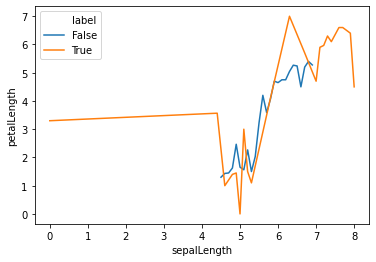

In [258]:
palette = sns.color_palette("hls", 3) 

sns.lineplot(
    x='sepalLength',
    y='petalLength',
    hue='label',# 
    data=df_length,
    ci = None,
    #palette=palette
    ) 

<AxesSubplot:xlabel='sepalWidth', ylabel='petalWidth'>

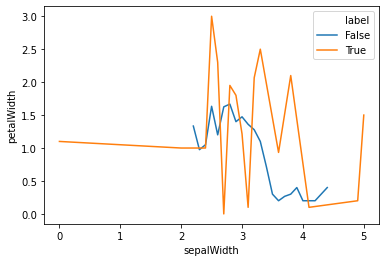

In [266]:
sns.lineplot(
    x='sepalWidth',
    y='petalWidth',
    hue='label',# 
    data=df_width,
    ci = None,
    #palette=palette
    ) 

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

In [260]:
# se quitan los outliers y se procede a graficar
df_clean = df.drop(['sepalWidth', 'petalWidth'], axis=1)
df_clean = df_clean.drop(df_clean[df_clean['label'] == True].index, inplace=False)
df_clean = df_clean.drop('label', axis = 1)


<AxesSubplot:xlabel='sepalLength', ylabel='petalLength'>

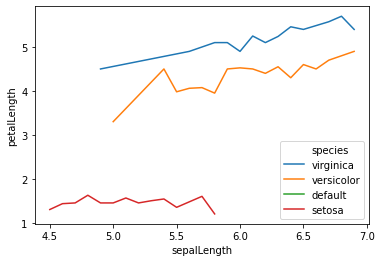

In [272]:
sns.lineplot(
    x='sepalLength',
    y='petalLength',
    hue='species',# 
    data=df_clean,
    ci = None,
    #alette=palette
    ) 